# Gender by Name - EDA + Classification

In this project, we explore the relationship between names and genders. The dataset contains a list of names along with their associated genders. Our goal is to perform Exploratory Data Analysis (EDA) to gain insights into the distribution of genders based on names and to build classification models that can predict the gender of a given name.

## Exploratory Data Analysis (EDA)

We start by conducting EDA to understand the distribution of genders based on names. Our analysis includes:

- Visualizing the gender distribution using bar charts or pie charts.
- Analyzing the length of names to identify any patterns.
- Exploring the frequency of names and their corresponding genders.


After gaining insights from the EDA, we proceed to build classification models to predict the gender of a given name. We employ the following models:

- **Logistic Regression:** A simple yet effective linear model for binary classification.
- **Random Forest:** A powerful ensemble learning method that combines multiple decision trees.
- **Decision Tree:** A single decision tree model for classification.


# Import data and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/gender-by-name/name_gender_dataset.csv')
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


# EDA - Exploratory Data Analysis

1. Summary statistics

In [3]:
df.describe()

,Count,Probability
count,1.472690e+05,1.472690e+05
mean,2.481161e+03,6.790295e-06
std,4.645472e+04,1.271345e-04
min,1.000000e+00,2.736740e-09
25%,5.000000e+00,1.368370e-08
50%,1.700000e+01,4.652460e-08
75%,1.320000e+02,3.612500e-07
max,5.304407e+06,1.451679e-02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [5]:
df.shape

(147269, 4)

Checking missing values:

In [6]:
df.isnull().sum()

Name           0
Gender         0
Count          0
Probability    0
dtype: int64

We don't have any missing values. That's really good!

2. Gender Distribution

Plot a bar chart and pie chart to visualize the distribution of genders ('M' and 'F') in the dataset.

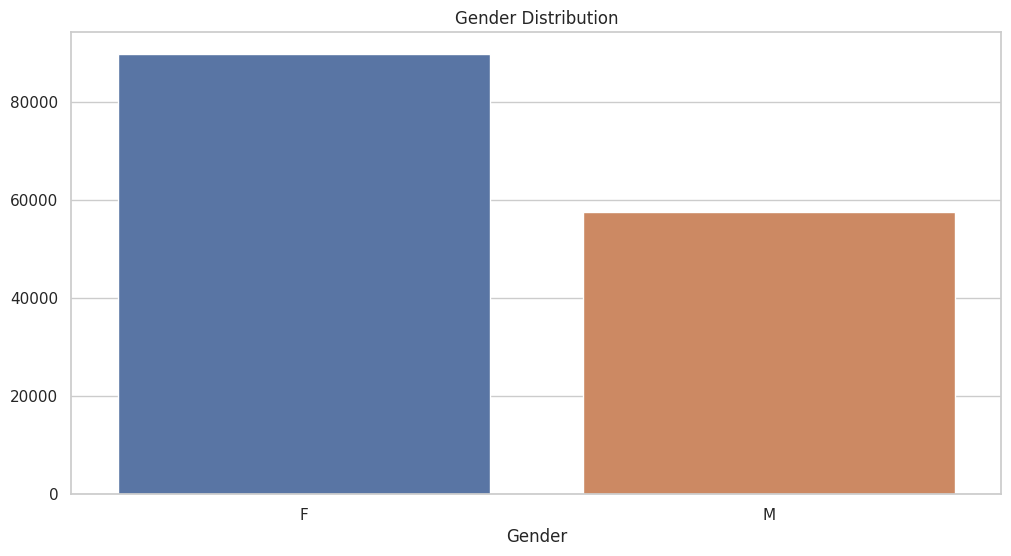

In [7]:
sns.set(style = 'whitegrid')

num_gender = df["Gender"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x = num_gender.index, y = num_gender.values)
plt.title('Gender Distribution')
plt.show()

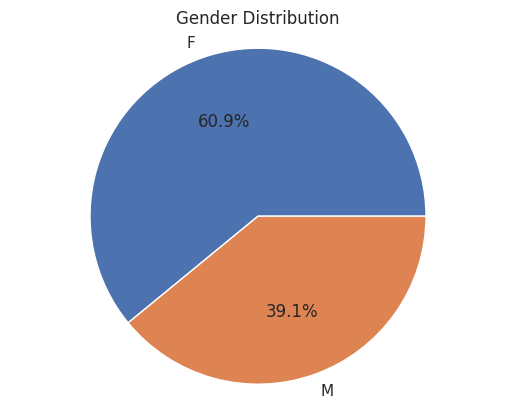

In [8]:
plt.pie(num_gender, labels= num_gender.index, autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

3. Top names in the dataset

In [9]:
df = df.sort_values(by = ['Count'], ascending = False)
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


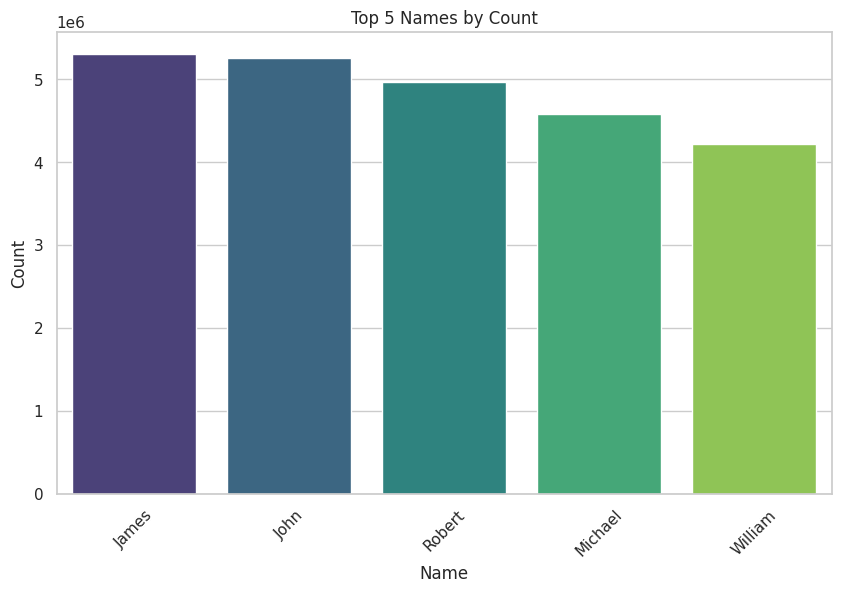

In [10]:
def top_names(data, top=5):
    top_names = data.sort_values(by='Count', ascending=False).head(top)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_names, x='Name', y='Count', palette='viridis')
    plt.title(f'Top {top} Names by Count')
    plt.xlabel('Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

top_names(df)

5. Name Length Analysis

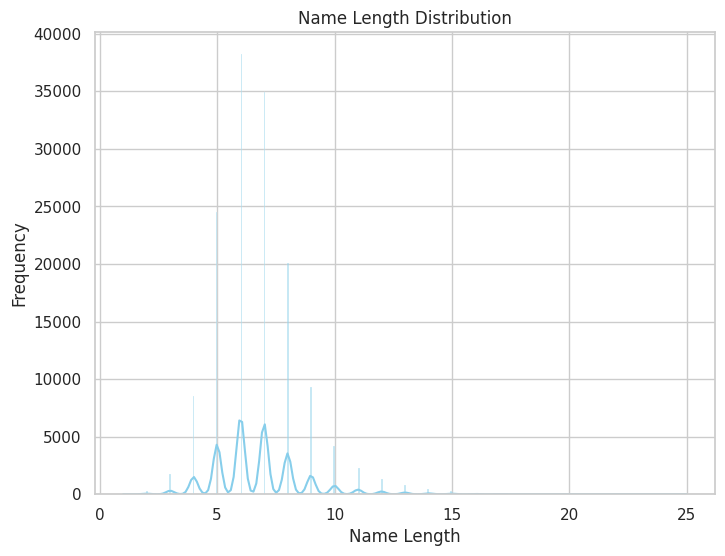

In [11]:
import warnings
warnings.filterwarnings('ignore')

def name_length(data):
    df['Name_length'] = df['Name'].apply(len)
    plt.figure(figsize = (8,6))
    sns.histplot(df ['Name_length'], kde = True, color= 'skyblue')
    plt.title('Name Length Distribution')
    plt.xlabel('Name Length')
    plt.ylabel('Frequency')
    plt.show()
    
name_length(df)

# Model Building & Evaluation

Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Gender'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Gender'])

categorical_cols = ['Name']
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)


In [14]:
def model_results(model,y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    cr= classification_report(y_true, y_pred)
    print(f'Model: {model}')
    print(accuracy)
    print(cr)

model_results(logistic_model, y_test, logistic_pred)

model_results("Random Forest", y_test, rf_pred)

model_results("Decision Tree", y_test, dt_pred)

Model: LogisticRegression()
0.60344944659469
              precision    recall  f1-score   support

           0       0.60      0.99      0.75     17730
           1       0.56      0.02      0.03     11724

    accuracy                           0.60     29454
   macro avg       0.58      0.50      0.39     29454
weighted avg       0.59      0.60      0.46     29454

Model: Random Forest
0.5974400760507911
              precision    recall  f1-score   support

           0       0.65      0.71      0.68     17730
           1       0.49      0.43      0.46     11724

    accuracy                           0.60     29454
   macro avg       0.57      0.57      0.57     29454
weighted avg       0.59      0.60      0.59     29454

Model: Decision Tree
0.6068445711957628
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     17730
           1       0.51      0.50      0.50     11724

    accuracy                           0.61     29454
   

ROC - AUC score for Logistic Regression

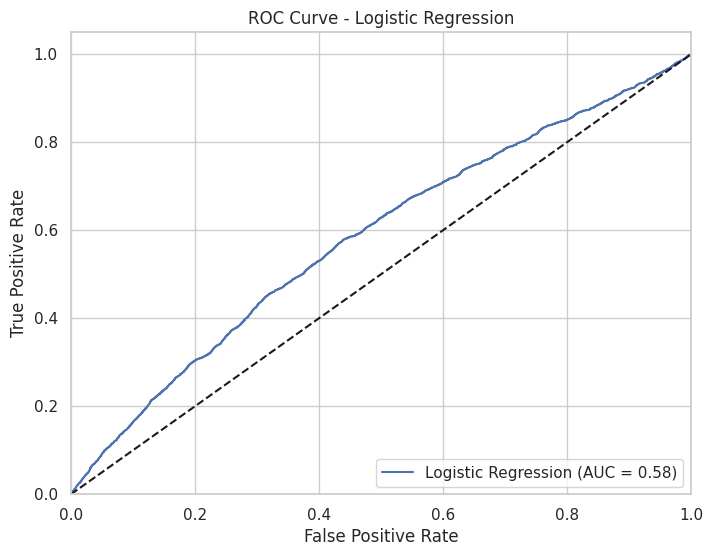

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

logistic_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

ROC - AUC score for Random Forest

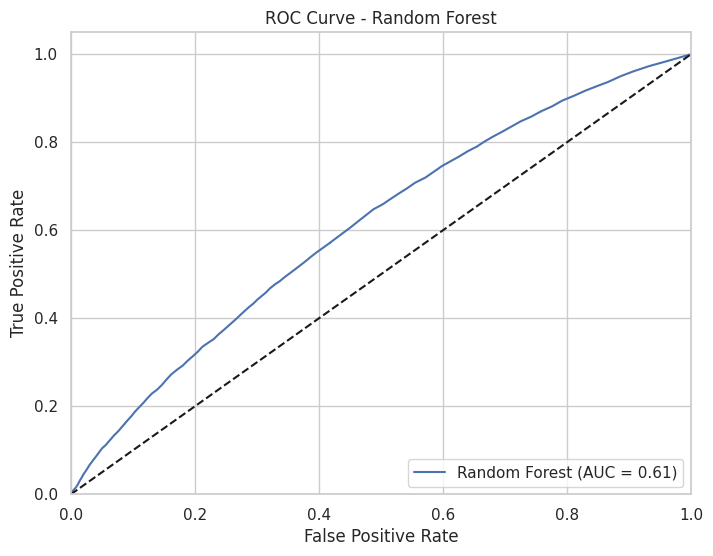

In [16]:
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

ROC - AUC score for Decision Tree

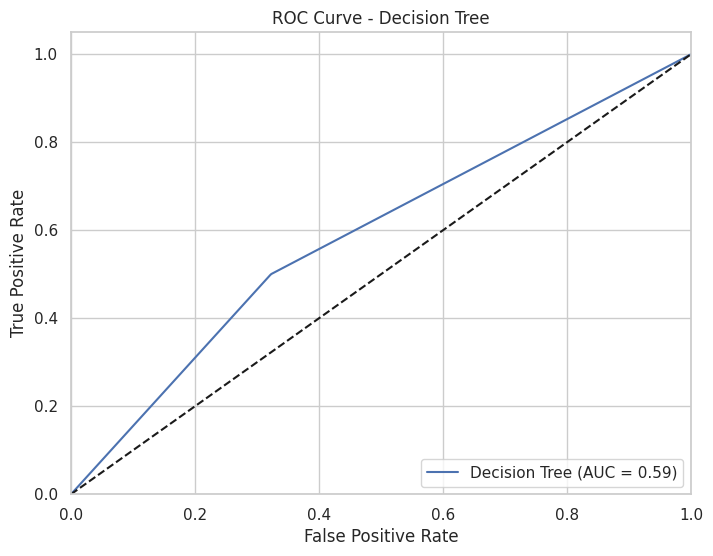

In [17]:
dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()